In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import torch
import sys
import random
from Networks import (
    DummySteerModel,
    SteerNN
)
import pickle

sys.path.append('./3_cameras/steerings/')
from steer001 import *
from steer002 import *
from steer003 import *
from steer004 import *
from steer005 import *
from steer006 import *
from steer007 import *
from steer008 import *
from steer009 import *
from steer010 import *
from steer011 import *
from steer012 import *

In [2]:
#put the steering data all in an array
steering001 = np.expand_dims(steering001,0)
steering002 = np.expand_dims(steering002,0)
steering003 = np.expand_dims(steering003,0)
steering004 = np.expand_dims(steering004,0)
steering005 = np.expand_dims(steering005,0)
steering006 = np.expand_dims(steering006,0)
steering007 = np.expand_dims(steering007,0)
steering008 = np.expand_dims(steering008,0)
steering009 = np.expand_dims(steering009,0)
steering010 = np.expand_dims(steering010,0)
steering011 = np.expand_dims(steering011,0)
steering012 = np.expand_dims(steering012,0)
print(steering001.shape)
steering_data = np.append(steering001, steering002, axis=0)
steering_data = np.append(steering_data, steering003, axis=0)
steering_data = np.append(steering_data, steering004, axis=0)
steering_data = np.append(steering_data, steering005, axis=0)
steering_data = np.append(steering_data, steering006, axis=0)
steering_data = np.append(steering_data, steering007, axis=0)
steering_data = np.append(steering_data, steering008, axis=0)
steering_data = np.append(steering_data, steering009, axis=0)
steering_data = np.append(steering_data, steering010, axis=0)
steering_data = np.append(steering_data, steering011, axis=0)
steering_data = np.append(steering_data, steering012, axis=0)
steering_data = steering_data *100
print(steering_data.shape)

(1, 110)
(12, 110)


In [3]:
#put the images and steeings into dicts
list_of_image_data = []
for j in range(1,13):
    path_to_images_middle = './3_cameras/Dataset%03d_middle/' %j
    path_to_images_left = './3_cameras/Dataset%03d_left/' %j
    path_to_images_right = './3_cameras/Dataset%03d_right/' %j
    image_paths_middle = os.listdir(path_to_images_middle)
    image_paths_left = os.listdir(path_to_images_left)
    image_paths_right = os.listdir(path_to_images_right)
    image_paths_middle.sort()
    image_paths_left.sort()
    image_paths_right.sort()
    #print(image_paths_left)     #number of images in each dataset:110
    print(path_to_images_middle)
    
    i = 0
    for im in image_paths_middle:
        image = np.empty([3,600,800])
        image_middle = np.transpose(cv2.imread(path_to_images_middle+im)[:,:,:1], (2, 0, 1))
        image_left = np.transpose(cv2.imread(path_to_images_left+im)[:,:,:1], (2, 0, 1))*0.5
        image_right = np.transpose(cv2.imread(path_to_images_right+im)[:,:,:1], (2, 0, 1))*0.5
        #img = (cv2.imread(path_to_images+im)[:,:,:3])/255
        #cv2.imshow("image", img)
        #cv2.waitKey(10) 
        image[0,:,:] = image_left
        image[1,:,:] = image_middle
        image[2,:,:] = image_right
        image = torch.from_numpy(image)
        image = image.float()      #convert from int to float
        imdict = {
            'image': image,
            'steer':steering_data[j-1][i]
        }
        list_of_image_data.append(imdict)
        i+=1


./3_cameras/Dataset001_middle/
./3_cameras/Dataset002_middle/
./3_cameras/Dataset003_middle/
./3_cameras/Dataset004_middle/
./3_cameras/Dataset005_middle/
./3_cameras/Dataset006_middle/
./3_cameras/Dataset007_middle/
./3_cameras/Dataset008_middle/
./3_cameras/Dataset009_middle/
./3_cameras/Dataset010_middle/
./3_cameras/Dataset011_middle/
./3_cameras/Dataset012_middle/


1320
torch.Size([3, 600, 800])
-1.006747


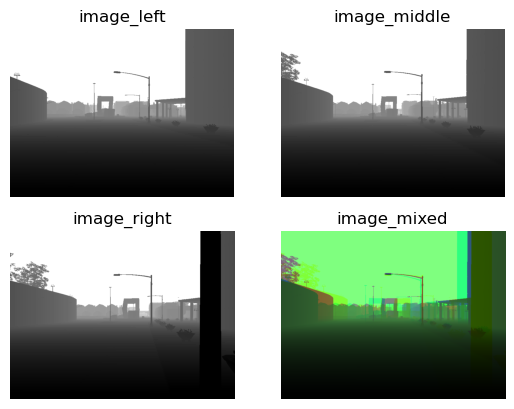

In [4]:
#show an image and its corresponding steering
print(len(list_of_image_data))
print(list_of_image_data[0]["image"].shape)    #size of image: torch.Size([1, 600, 800])
print(list_of_image_data[0]["steer"])

#visualize the images
image = (list_of_image_data[0]["image"].clone()/255 ).view(3, 600, 800)  
image = np.transpose(image,(1,2,0))
image_left = image[:,:,0]
image_middle = image[:,:,1]
image_right = image[:,:,2]


plt.subplot(2, 2, 1)
plt.imshow(image_left, cmap='gray')
plt.axis('off')
plt.title("image_left")
plt.subplot(2, 2, 2)
plt.imshow(image_middle, cmap='gray')
plt.axis('off')
plt.title("image_middle")
plt.subplot(2, 2, 3)
plt.imshow(image_right, cmap='gray')
plt.axis('off')
plt.title("image_right")
plt.subplot(2, 2, 4)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("image_mixed")
plt.show()

In [5]:
def num_in_range(lst,small,large):
    length = len(lst)
    num = 0
    for i in range(length):
        if (lst[i]['steer']>= small) & (lst[i]['steer']<= large):
            num += 1
    return num

In [6]:
#list_of_image_data.sort(key=lambda k: (k.get('steer', 0))) #sort the list according to 'steer'
print("turning left", num_in_range(list_of_image_data,-100,-4))
print("going straight", num_in_range(list_of_image_data,-4,4))
print("turning right", num_in_range(list_of_image_data,4,100))

turning left 388
going straight 546
turning right 386


In [11]:
random.shuffle(list_of_image_data)   #shuffle the list randomly
print(list_of_image_data[0]['steer'])
train_dataset = list_of_image_data[:1000]
val_dataset = list_of_image_data[1000:]
print("length of training dataset", len(train_dataset))
print("length of validation dataset", len(val_dataset))
print(train_dataset[0]['steer'])
print(val_dataset[0]['steer'])

-0.8092210000000001
length of training dataset 1000
length of validation dataset 320
-0.8092210000000001
12.631834


In [15]:
hparams = {
    "learning_rate": 0.9e-3,
    "batch_size": 50,
}  

In [16]:
#test with one image before training
steer_model = SteerNN(hparams)
#print(list_of_image_data[0]['image'])
steer_model(list_of_image_data[0]['image'])

tensor([[-6.3014]], grad_fn=<AddmmBackward>)

In [17]:
import pytorch_lightning as pl

steer_model = SteerNN(hparams, train_dataset, val_dataset)


trainer = pl.Trainer(
    weights_summary=None,
    max_epochs=25,
    progress_bar_refresh_rate=1, # to prevent notebook crashes in Google Colab environments    
)

trainer.fit(steer_model)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Validation sanity check: 0it [00:00, ?it/s]

validation loss tensor(103.4335, dtype=torch.float64)
validation loss tensor(107.2663, dtype=torch.float64)


Training: -1it [00:00, ?it/s]

training loss tensor(116.4216, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(144747.2082, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(593822.0600, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(44183.2860, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(274383.0146, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(181412.2538, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(68745.2963, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(9513.1273, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(13833.6991, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(44898.6003, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(39183.9762, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(36932.1046, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(18404.

Validating: 0it [00:00, ?it/s]

validation loss tensor(968.0723, dtype=torch.float64)
validation loss tensor(609.8408, dtype=torch.float64)
validation loss tensor(688.7126, dtype=torch.float64)
validation loss tensor(916.0009, dtype=torch.float64)
validation loss tensor(659.1155, dtype=torch.float64)
validation loss tensor(830.5898, dtype=torch.float64)
validation loss tensor(1268.7766, dtype=torch.float64)
training loss tensor(909.9118, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1367.5383, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(2233.2520, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(2636.9862, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1818.9347, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1311.0158, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(731.8581, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(638.0026, dtype=torch.float64, grad_fn=<Ms

Validating: 0it [00:00, ?it/s]

validation loss tensor(168.7220, dtype=torch.float64)
validation loss tensor(160.8850, dtype=torch.float64)
validation loss tensor(217.0931, dtype=torch.float64)
validation loss tensor(163.9123, dtype=torch.float64)
validation loss tensor(163.8621, dtype=torch.float64)
validation loss tensor(176.1238, dtype=torch.float64)
validation loss tensor(131.3333, dtype=torch.float64)
training loss tensor(153.5566, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(220.3920, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(377.8545, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(414.3477, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(231.2089, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(169.3975, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(150.7401, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(230.4592, dtype=torch.float64, grad_fn=<MseLossB

Validating: 0it [00:00, ?it/s]

validation loss tensor(55.9087, dtype=torch.float64)
validation loss tensor(53.9745, dtype=torch.float64)
validation loss tensor(45.6461, dtype=torch.float64)
validation loss tensor(38.7418, dtype=torch.float64)
validation loss tensor(45.1518, dtype=torch.float64)
validation loss tensor(39.9158, dtype=torch.float64)
validation loss tensor(37.0213, dtype=torch.float64)
training loss tensor(49.9821, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(74.4699, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(83.1855, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(64.9390, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(42.8221, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(65.6086, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(48.7936, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(49.1025, dtype=torch.float64, grad_fn=<MseLossBackward>)
train

Validating: 0it [00:00, ?it/s]

validation loss tensor(15.2549, dtype=torch.float64)
validation loss tensor(24.0120, dtype=torch.float64)
validation loss tensor(31.4868, dtype=torch.float64)
validation loss tensor(24.1700, dtype=torch.float64)
validation loss tensor(21.2504, dtype=torch.float64)
validation loss tensor(34.2987, dtype=torch.float64)
validation loss tensor(20.9608, dtype=torch.float64)
training loss tensor(23.3483, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(31.7464, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(22.9171, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(24.5703, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(19.7812, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(33.4415, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(33.2409, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(29.9548, dtype=torch.float64, grad_fn=<MseLossBackward>)
train

Validating: 0it [00:00, ?it/s]

validation loss tensor(11.9768, dtype=torch.float64)
validation loss tensor(15.3137, dtype=torch.float64)
validation loss tensor(20.2136, dtype=torch.float64)
validation loss tensor(12.0664, dtype=torch.float64)
validation loss tensor(13.5074, dtype=torch.float64)
validation loss tensor(16.1548, dtype=torch.float64)
validation loss tensor(11.7350, dtype=torch.float64)
training loss tensor(16.2754, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(16.7374, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(14.7087, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(21.0685, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(20.0323, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(24.7241, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(19.0082, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(16.6544, dtype=torch.float64, grad_fn=<MseLossBackward>)
train

Validating: 0it [00:00, ?it/s]

validation loss tensor(9.6633, dtype=torch.float64)
validation loss tensor(12.4615, dtype=torch.float64)
validation loss tensor(17.5166, dtype=torch.float64)
validation loss tensor(12.9450, dtype=torch.float64)
validation loss tensor(19.0412, dtype=torch.float64)
validation loss tensor(18.2182, dtype=torch.float64)
validation loss tensor(16.7944, dtype=torch.float64)
training loss tensor(15.5864, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(11.7736, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(16.3387, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(17.4461, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(6.9493, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(15.0437, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(14.3022, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(15.9801, dtype=torch.float64, grad_fn=<MseLossBackward>)
trainin

Validating: 0it [00:00, ?it/s]

validation loss tensor(7.4870, dtype=torch.float64)
validation loss tensor(10.1048, dtype=torch.float64)
validation loss tensor(13.1505, dtype=torch.float64)
validation loss tensor(7.3427, dtype=torch.float64)
validation loss tensor(9.4817, dtype=torch.float64)
validation loss tensor(12.0273, dtype=torch.float64)
validation loss tensor(5.2200, dtype=torch.float64)
training loss tensor(15.9042, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(9.9453, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(10.9811, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(9.2988, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(10.0900, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(14.3390, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(9.7051, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(9.4218, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss

Validating: 0it [00:00, ?it/s]

validation loss tensor(6.1882, dtype=torch.float64)
validation loss tensor(9.0701, dtype=torch.float64)
validation loss tensor(13.7540, dtype=torch.float64)
validation loss tensor(8.1184, dtype=torch.float64)
validation loss tensor(12.2312, dtype=torch.float64)
validation loss tensor(13.4113, dtype=torch.float64)
validation loss tensor(10.6167, dtype=torch.float64)
training loss tensor(6.3371, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(7.5047, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(6.0673, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(8.0318, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(8.2008, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(10.0259, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(5.2038, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(12.6500, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss 

Validating: 0it [00:00, ?it/s]

validation loss tensor(5.4793, dtype=torch.float64)
validation loss tensor(8.8988, dtype=torch.float64)
validation loss tensor(10.8346, dtype=torch.float64)
validation loss tensor(5.5668, dtype=torch.float64)
validation loss tensor(10.1271, dtype=torch.float64)
validation loss tensor(10.9765, dtype=torch.float64)
validation loss tensor(7.5735, dtype=torch.float64)
training loss tensor(6.9566, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(7.0267, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(10.0326, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(5.1452, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(5.1419, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(6.6727, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(6.4689, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(7.0124, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss te

Validating: 0it [00:00, ?it/s]

validation loss tensor(6.1678, dtype=torch.float64)
validation loss tensor(9.5942, dtype=torch.float64)
validation loss tensor(11.5708, dtype=torch.float64)
validation loss tensor(5.2430, dtype=torch.float64)
validation loss tensor(9.0262, dtype=torch.float64)
validation loss tensor(10.3969, dtype=torch.float64)
validation loss tensor(4.7805, dtype=torch.float64)
training loss tensor(5.3347, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(3.4207, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(4.9379, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(3.6283, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(4.9432, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(3.8890, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(3.7584, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(6.3191, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tens

Validating: 0it [00:00, ?it/s]

validation loss tensor(5.9736, dtype=torch.float64)
validation loss tensor(8.5194, dtype=torch.float64)
validation loss tensor(11.3050, dtype=torch.float64)
validation loss tensor(4.4338, dtype=torch.float64)
validation loss tensor(9.6719, dtype=torch.float64)
validation loss tensor(11.0177, dtype=torch.float64)
validation loss tensor(5.6146, dtype=torch.float64)
training loss tensor(3.1823, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(2.7652, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(5.7967, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(3.2191, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(4.4075, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(3.2893, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(4.0557, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(4.1787, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tens

Validating: 0it [00:00, ?it/s]

validation loss tensor(5.4836, dtype=torch.float64)
validation loss tensor(8.7092, dtype=torch.float64)
validation loss tensor(11.5547, dtype=torch.float64)
validation loss tensor(4.9373, dtype=torch.float64)
validation loss tensor(10.8456, dtype=torch.float64)
validation loss tensor(11.3277, dtype=torch.float64)
validation loss tensor(8.0832, dtype=torch.float64)
training loss tensor(1.8221, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(2.8818, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(3.6941, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(3.3273, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(3.8991, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(3.0940, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(2.8429, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(2.9468, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss ten

Validating: 0it [00:00, ?it/s]

validation loss tensor(6.2427, dtype=torch.float64)
validation loss tensor(9.3315, dtype=torch.float64)
validation loss tensor(10.7891, dtype=torch.float64)
validation loss tensor(4.1720, dtype=torch.float64)
validation loss tensor(8.5481, dtype=torch.float64)
validation loss tensor(10.1823, dtype=torch.float64)
validation loss tensor(4.2279, dtype=torch.float64)
training loss tensor(2.5232, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(2.1814, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(2.5247, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(2.5707, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(4.5760, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(2.2029, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.7204, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.9627, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tens

Validating: 0it [00:00, ?it/s]

validation loss tensor(5.7756, dtype=torch.float64)
validation loss tensor(8.6990, dtype=torch.float64)
validation loss tensor(11.1673, dtype=torch.float64)
validation loss tensor(4.7225, dtype=torch.float64)
validation loss tensor(10.6458, dtype=torch.float64)
validation loss tensor(11.2253, dtype=torch.float64)
validation loss tensor(8.5194, dtype=torch.float64)
training loss tensor(1.5702, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(2.2990, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(3.5941, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(2.0575, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.6028, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(2.0741, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.9964, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.3904, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss ten

Validating: 0it [00:00, ?it/s]

validation loss tensor(5.7119, dtype=torch.float64)
validation loss tensor(8.9895, dtype=torch.float64)
validation loss tensor(11.0247, dtype=torch.float64)
validation loss tensor(4.2261, dtype=torch.float64)
validation loss tensor(9.3547, dtype=torch.float64)
validation loss tensor(10.0218, dtype=torch.float64)
validation loss tensor(4.9391, dtype=torch.float64)
training loss tensor(2.8638, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.7363, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.8843, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.3662, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.4676, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.2586, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.4977, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.8567, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tens

Validating: 0it [00:00, ?it/s]

validation loss tensor(5.5832, dtype=torch.float64)
validation loss tensor(8.7076, dtype=torch.float64)
validation loss tensor(10.1274, dtype=torch.float64)
validation loss tensor(3.6552, dtype=torch.float64)
validation loss tensor(8.6271, dtype=torch.float64)
validation loss tensor(9.8280, dtype=torch.float64)
validation loss tensor(4.7013, dtype=torch.float64)
training loss tensor(0.9001, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.4758, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.5146, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.3284, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.4244, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.3778, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(2.7037, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.8911, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tenso

Validating: 0it [00:00, ?it/s]

validation loss tensor(5.4780, dtype=torch.float64)
validation loss tensor(8.3148, dtype=torch.float64)
validation loss tensor(9.9791, dtype=torch.float64)
validation loss tensor(3.6805, dtype=torch.float64)
validation loss tensor(8.5998, dtype=torch.float64)
validation loss tensor(9.8337, dtype=torch.float64)
validation loss tensor(4.9557, dtype=torch.float64)
training loss tensor(1.1081, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.6342, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.0283, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.8192, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.9383, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.0117, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.6879, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.1654, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor

Validating: 0it [00:00, ?it/s]

validation loss tensor(5.9808, dtype=torch.float64)
validation loss tensor(8.2748, dtype=torch.float64)
validation loss tensor(10.6221, dtype=torch.float64)
validation loss tensor(4.2222, dtype=torch.float64)
validation loss tensor(9.5885, dtype=torch.float64)
validation loss tensor(10.8237, dtype=torch.float64)
validation loss tensor(6.7143, dtype=torch.float64)
training loss tensor(1.0393, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.8471, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.7573, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.8492, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.8101, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.7412, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.8862, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.8589, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tens

Validating: 0it [00:00, ?it/s]

validation loss tensor(5.7467, dtype=torch.float64)
validation loss tensor(8.6553, dtype=torch.float64)
validation loss tensor(10.0430, dtype=torch.float64)
validation loss tensor(3.2488, dtype=torch.float64)
validation loss tensor(8.5068, dtype=torch.float64)
validation loss tensor(9.3305, dtype=torch.float64)
validation loss tensor(5.0772, dtype=torch.float64)
training loss tensor(0.6445, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.8272, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.9135, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.3521, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.0455, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.7178, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.3430, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.8948, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tenso

Validating: 0it [00:00, ?it/s]

validation loss tensor(5.8084, dtype=torch.float64)
validation loss tensor(8.4671, dtype=torch.float64)
validation loss tensor(10.5064, dtype=torch.float64)
validation loss tensor(3.8601, dtype=torch.float64)
validation loss tensor(9.2164, dtype=torch.float64)
validation loss tensor(10.7005, dtype=torch.float64)
validation loss tensor(6.0490, dtype=torch.float64)
training loss tensor(0.3805, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.3970, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.4433, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.7229, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.4630, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.9161, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.5886, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.4969, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tens

Validating: 0it [00:00, ?it/s]

validation loss tensor(5.6144, dtype=torch.float64)
validation loss tensor(8.2619, dtype=torch.float64)
validation loss tensor(10.0289, dtype=torch.float64)
validation loss tensor(3.3033, dtype=torch.float64)
validation loss tensor(8.6369, dtype=torch.float64)
validation loss tensor(9.7366, dtype=torch.float64)
validation loss tensor(5.0971, dtype=torch.float64)
training loss tensor(0.3259, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.4678, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.5757, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.5475, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.5933, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.4158, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.6185, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.5987, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tenso

Validating: 0it [00:00, ?it/s]

validation loss tensor(5.8165, dtype=torch.float64)
validation loss tensor(8.4085, dtype=torch.float64)
validation loss tensor(10.0728, dtype=torch.float64)
validation loss tensor(3.4317, dtype=torch.float64)
validation loss tensor(8.7092, dtype=torch.float64)
validation loss tensor(9.8570, dtype=torch.float64)
validation loss tensor(5.3550, dtype=torch.float64)
training loss tensor(0.3729, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.4658, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.5033, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.4449, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.3651, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.5141, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.2385, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.4363, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tenso

Validating: 0it [00:00, ?it/s]

validation loss tensor(5.6345, dtype=torch.float64)
validation loss tensor(8.4828, dtype=torch.float64)
validation loss tensor(9.8918, dtype=torch.float64)
validation loss tensor(3.4049, dtype=torch.float64)
validation loss tensor(8.3505, dtype=torch.float64)
validation loss tensor(9.7756, dtype=torch.float64)
validation loss tensor(5.5617, dtype=torch.float64)
training loss tensor(0.2689, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.6011, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.4749, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.2522, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.4925, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.3512, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.3573, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.3188, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor

Validating: 0it [00:00, ?it/s]

validation loss tensor(5.5957, dtype=torch.float64)
validation loss tensor(8.3793, dtype=torch.float64)
validation loss tensor(10.1697, dtype=torch.float64)
validation loss tensor(3.5680, dtype=torch.float64)
validation loss tensor(9.0553, dtype=torch.float64)
validation loss tensor(10.1640, dtype=torch.float64)
validation loss tensor(6.3181, dtype=torch.float64)
training loss tensor(0.7127, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.2796, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.3690, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.3614, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.4210, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.1796, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.5614, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.2987, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tens

Validating: 0it [00:00, ?it/s]

validation loss tensor(5.6173, dtype=torch.float64)
validation loss tensor(8.3653, dtype=torch.float64)
validation loss tensor(10.0379, dtype=torch.float64)
validation loss tensor(3.2589, dtype=torch.float64)
validation loss tensor(8.9209, dtype=torch.float64)
validation loss tensor(10.1493, dtype=torch.float64)
validation loss tensor(5.8620, dtype=torch.float64)


In [23]:
#test with one image after training
steer_test = steer_model(list_of_image_data[1300]['image'])/100
steer_test = float(steer_test)
print(steer_test)
print(list_of_image_data[1300]['steer']/100)

0.06106620281934738
0.0684832782


In [24]:
PATH = 'models/2extra_camera_2.p'
torch.save(steer_model.state_dict(),PATH)

In [26]:
PATH = 'models/2extra_camera_2.p'
steer_model2 = SteerNN(None)
steer_model2.load_state_dict(torch.load(PATH))
print(steer_model2(list_of_image_data[1300]['image'])/100)
print(list_of_image_data[1300]['steer']/100)

tensor([[0.0611]], grad_fn=<DivBackward0>)
0.0684832782
